In [1]:
import numpy as np
import pandas as pd
import os, sys

path = os.getcwd()
sys.path.append(path + '../../..')

from neuralnetwork import NeuralNetwork

In [2]:
df = pd.read_csv('iris.txt', sep=',', header=None)
df.columns = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
test_labels = np.array(df['class'][:6])
test_data = np.array(df.loc[:5, df.columns!='class'])

train_labels = np.array(df['class'][5:])
train_data = np.array(df.loc[5:, df.columns!='class'])

In [4]:
def transform(arr):
    temp = np.zeros((len(arr), 3)) 
    for i in range(len(arr)):
        if arr[i] == 'Iris-versicolor':
            temp[i][0] = 1.0
        elif arr[i] == 'Iris-setosa':
            temp[i][1] = 1.0
        elif arr[i] == 'Iris-virginica':
            temp[i][2] = 1.0
    return temp

train_labels = transform(train_labels)

Epoch: 1 | Loss: 0.2941199718058942
Epoch: 2 | Loss: 0.27067458745107054
Epoch: 3 | Loss: 0.2574421438225739
Epoch: 4 | Loss: 0.24636434480043892
Epoch: 5 | Loss: 0.23390735150527742
Epoch: 6 | Loss: 0.22173395044831815
Epoch: 7 | Loss: 0.2076327889606494
Epoch: 8 | Loss: 0.19196230801616365
Epoch: 9 | Loss: 0.17570564516427378
Epoch: 10 | Loss: 0.15969869580878623


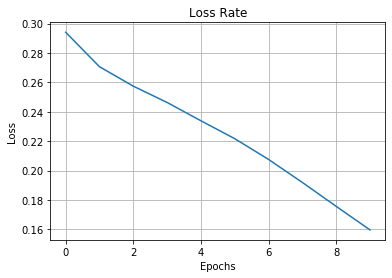

In [5]:
nn = NeuralNetwork([4, 16, 3])
# nn.load('model')
nn.back_prop(
    X=train_data,
    Y=train_labels,
    epochs=10,
    rate=0.1,
    plot=True
)

In [6]:
for i in range(len(test_data)):
    pred = np.argmax(nn.forward_prop(test_data[i]))
    if pred == 0:
        pred = 'Iris-versicolor'
    elif pred == 1:
        pred = 'Iris-setosa'
    elif pred == 2:
        pred ='Iris-virginica'
    print(f'True: {test_labels[i]} |  Pred: {pred}')

True: Iris-virginica |  Pred: Iris-virginica
True: Iris-setosa |  Pred: Iris-setosa
True: Iris-versicolor |  Pred: Iris-versicolor
True: Iris-setosa |  Pred: Iris-setosa
True: Iris-setosa |  Pred: Iris-setosa
True: Iris-versicolor |  Pred: Iris-versicolor


In [7]:
nn.save('model')

Model Saved
